### Importing Dependencies

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Data Collection

In [403]:
train = pd.read_csv(r"C:\Users\spark tech\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\spark tech\Downloads\test.csv")

In [404]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [211]:
train.shape, test.shape

((891, 12), (418, 11))

## Checking Misiing Values

In [405]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As we see that 687 values are missing for Cabin Column, 117 age is missing and 2 embarked vaules are missing. we can not gues 687 cabin values so we simply drop them, we will work on age and Embarked values

In [406]:
train.drop(columns=["Cabin"],inplace= True)
test.drop(columns=["Cabin"],inplace= True)


In [214]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [407]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## As we see that maximum passanger come from point S so we suppose that for the other two passenger

In [408]:
train["Embarked"].fillna("S",inplace = True)
test["Embarked"].fillna("S",inplace = True)

In [409]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [218]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

#### now its time for Age we can generate ramdom age for that purpose or we can fill NA values by Mean of the given Age of the passengers

In [410]:
train_Random_age = np.random.randint(train["Age"].mean()-train["Age"].std(),train["Age"].mean()+train["Age"].std(), 177)
train_Random_age

array([42, 30, 33, 37, 23, 22, 16, 15, 35, 39, 26, 27, 15, 40, 38, 26, 21,
       41, 41, 26, 16, 35, 42, 39, 18, 33, 30, 35, 29, 18, 41, 38, 30, 28,
       42, 33, 24, 20, 41, 39, 15, 24, 15, 43, 40, 15, 17, 42, 34, 39, 29,
       23, 21, 18, 33, 15, 20, 41, 36, 42, 31, 27, 26, 38, 38, 32, 17, 40,
       33, 28, 33, 35, 27, 36, 15, 37, 43, 26, 37, 21, 42, 26, 39, 37, 21,
       28, 34, 18, 41, 32, 32, 33, 38, 36, 26, 19, 42, 41, 26, 21, 18, 31,
       39, 18, 31, 21, 22, 26, 39, 41, 20, 35, 32, 40, 27, 37, 26, 29, 26,
       20, 27, 18, 16, 22, 40, 19, 37, 20, 38, 30, 43, 23, 33, 18, 34, 18,
       26, 21, 37, 34, 31, 28, 17, 29, 41, 39, 40, 37, 29, 21, 22, 24, 37,
       17, 20, 37, 21, 38, 27, 40, 26, 43, 35, 38, 37, 42, 16, 28, 20, 39,
       19, 16, 21, 33, 42, 33, 25])

In [411]:
test_Random_age = np.random.randint(test["Age"].mean()-test["Age"].std(),test["Age"].mean()+test["Age"].std(), 86)
test_Random_age

array([42, 18, 40, 25, 19, 36, 22, 39, 27, 16, 19, 40, 30, 24, 42, 28, 43,
       17, 43, 22, 17, 25, 21, 39, 27, 37, 40, 22, 31, 39, 36, 27, 17, 31,
       42, 38, 32, 29, 42, 29, 39, 17, 17, 16, 42, 29, 29, 27, 28, 41, 43,
       16, 41, 19, 41, 33, 18, 25, 35, 36, 25, 36, 35, 22, 28, 43, 23, 42,
       43, 35, 26, 40, 34, 41, 38, 36, 32, 34, 34, 43, 18, 29, 21, 43, 33,
       41])

## We use mapping to fill all those NA Age values with random numbers

In [412]:
train["Age"][train["Age"].isnull()]=train_Random_age
test["Age"][test["Age"].isnull()]=test_Random_age
# AS train["Age"].isnull() will gives us all the NA ages

C:\Users\spark tech\AppData\Local\Temp\ipykernel_3080\1198158573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][train["Age"].isnull()]=train_Random_age
C:\Users\spark tech\AppData\Local\Temp\ipykernel_3080\1198158573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Age"][test["Age"].isnull()]=test_Random_age


In [413]:
train.isnull().sum()
#Checking for NA values in train data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [223]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## Again one value is missing for Fare column oin test data

In [233]:
test["Fare"].mean()

35.627188489208635

In [414]:
test["Fare"].fillna(test["Fare"].mean(),inplace = True)

In [235]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [228]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [229]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


### Now our dependend variable is Survived column, we suppose to prdict whether the passenger in test data is survived or not on the basis of the given independent remaining column. For that we will build a MODEL ON THE BASIS OF THE TRAIN DATA

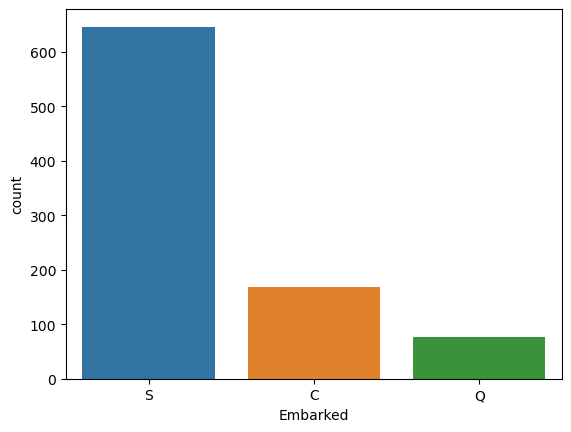

In [230]:
sns.countplot(x='Embarked', data=train)
plt.show()

In [231]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [335]:
x= (549*100)/(549+342)
x
# % of Died Passsengers

61.61616161616162

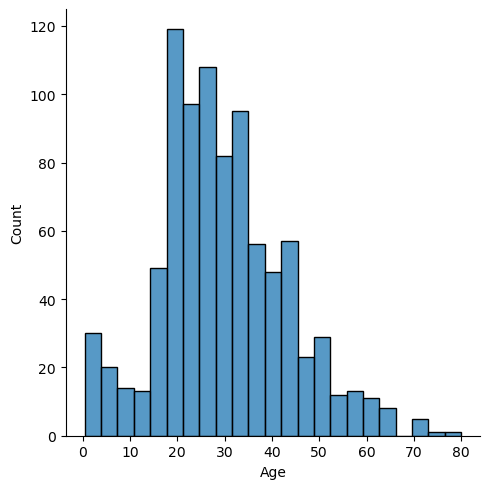

In [232]:
sns.displot(train["Age"])

## Lets check impact of every Column of Survived Column

In [236]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [258]:
# Checking Pclass realtionship with Survived 
train[train["Pclass"]==1]["Survived"].value_counts()
#this shows that in Pclass 1 136 survived and 80 were died

1    136
0     80
Name: Survived, dtype: int64

In [259]:
train[train["Pclass"]==2]["Survived"].value_counts()
#details of Pclass 2

0    97
1    87
Name: Survived, dtype: int64

In [262]:
train[train["Pclass"]==3]["Survived"].value_counts()
#Pclass 3

0    372
1    119
Name: Survived, dtype: int64

In [261]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [354]:
train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [357]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [358]:
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

## Seprating Survived and died passengers data for analuysis purpose

In [301]:
df0=train[train["Survived"]==0]
df1=train[train["Survived"]==1]
#It gives us data of all Survived and Dead pasenger let save in variable named df0 and df1

In [290]:
df0.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


In [291]:
df0['Age'].describe()

count    549.000000
mean      30.279599
std       13.098750
min        1.000000
25%       21.000000
50%       28.000000
75%       38.000000
max       74.000000
Name: Age, dtype: float64

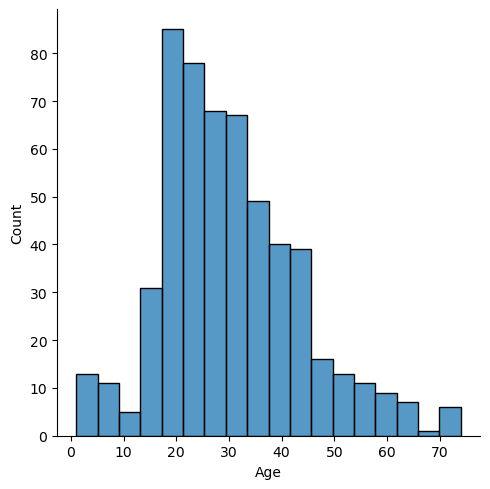

In [300]:
sns.displot(df0["Age"])
# Groph shows died passengers and their Ages

In [302]:
df1["Age"].describe()
# Details of survived passenger

count    342.000000
mean      28.443480
std       14.154514
min        0.420000
25%       19.000000
50%       28.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

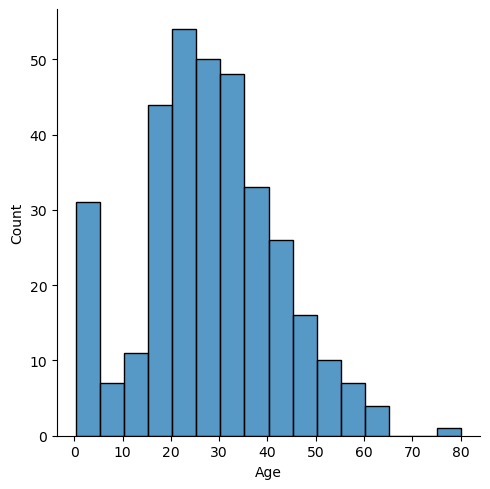

In [304]:
sns.displot(df1["Age"])
#graph of Survived pasenger and thier Ages

In [305]:
df1["Sex"].describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

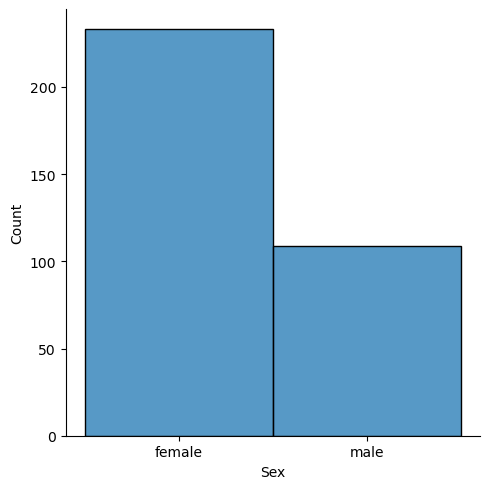

In [306]:
sns.displot(df1["Sex"])
#Relation of Sex And Survived Passenger

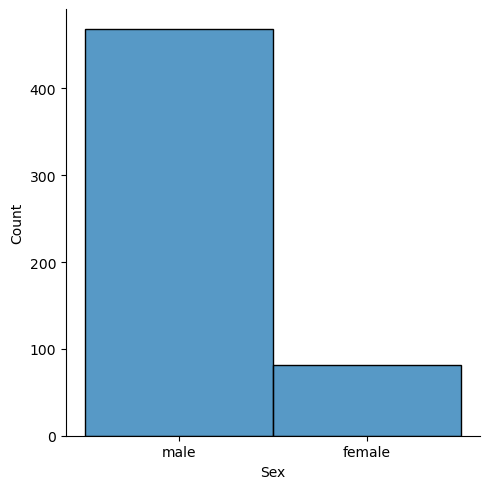

In [316]:
sns.displot(df0["Sex"])
#Relation of Sex And NOn Survived Passenger

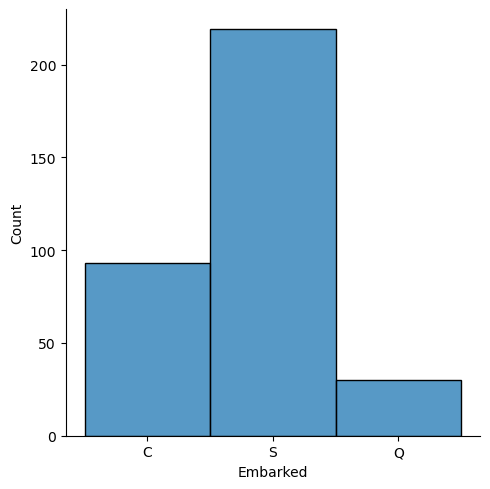

In [317]:
sns.displot(df1["Embarked"])
#Relation of Embarked And Survived Passenger

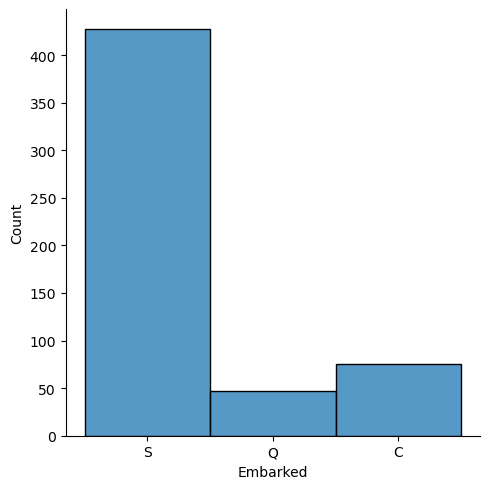

In [319]:
sns.displot(df0["Embarked"])
#Relation of Embarked And NOn Survived Passenger

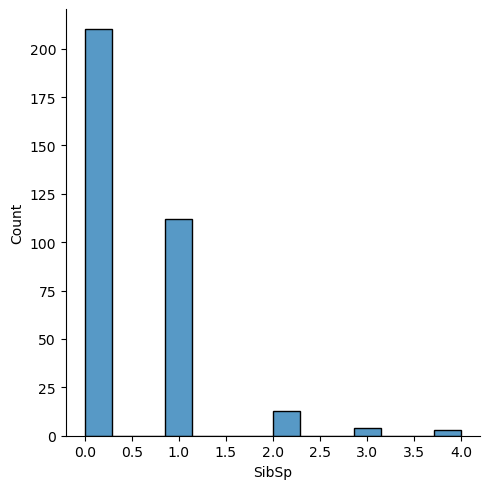

In [320]:
sns.displot(df1["SibSp"])

#Relation of SilSp And Survived Passenger

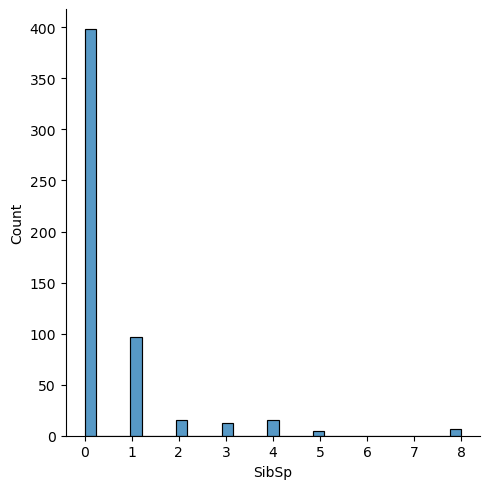

In [321]:
sns.displot(df0["SibSp"])

#Relation of Embarked And NOn Survived Passenger

In [327]:
df0.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [328]:
df1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


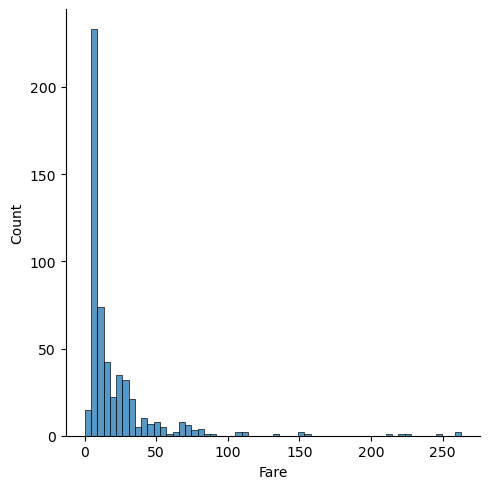

In [329]:
sns.displot(df0["Fare"])

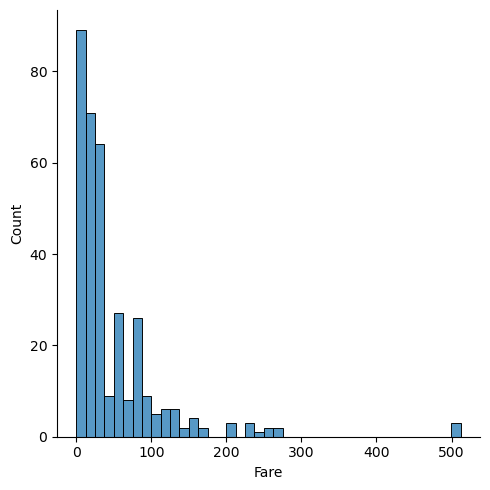

In [330]:
sns.displot(df1["Fare"])

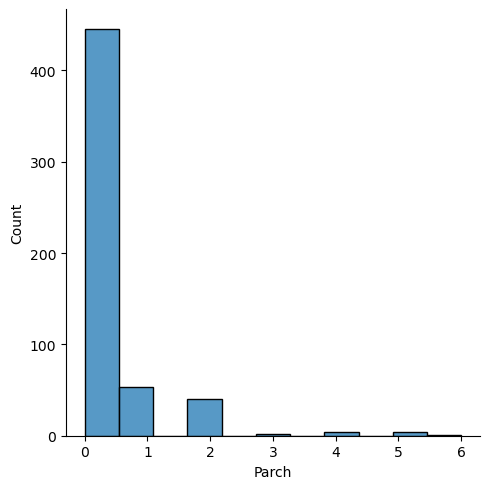

In [331]:
sns.displot(df0["Parch"])

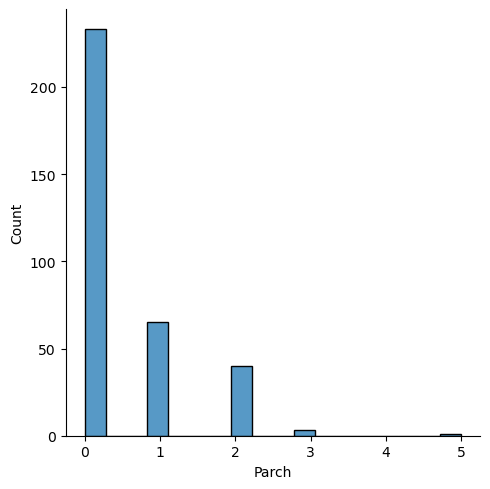

In [332]:
sns.displot(df1["Parch"])

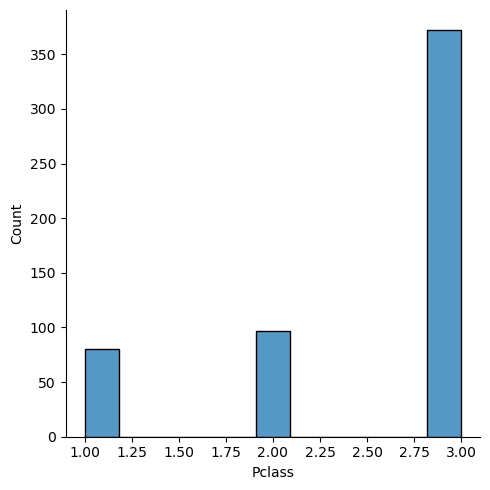

In [337]:
sns.displot(df0["Pclass"])

In [364]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


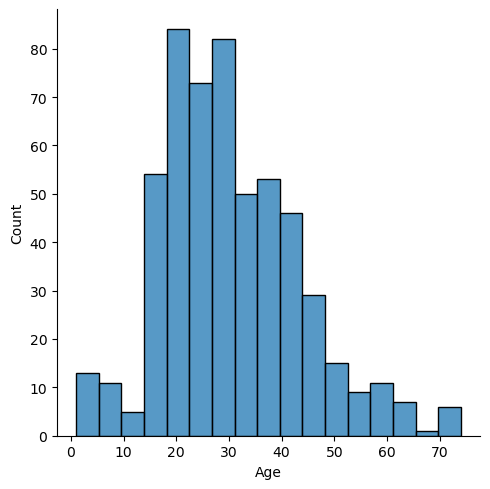

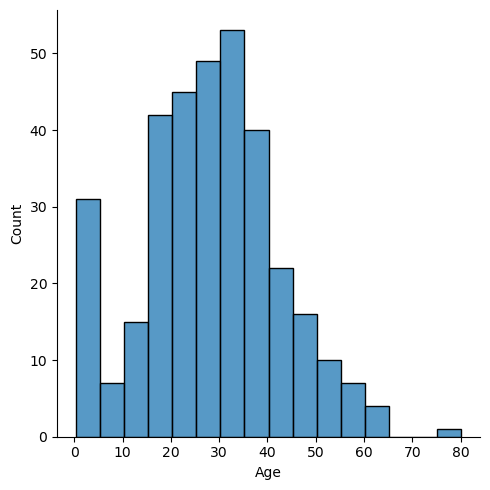

In [415]:
sns.displot(train["Age"][train["Survived"]==0])
sns.displot(train["Age"][train["Survived"]==1])
# relation between age and survived and non survived paseenger

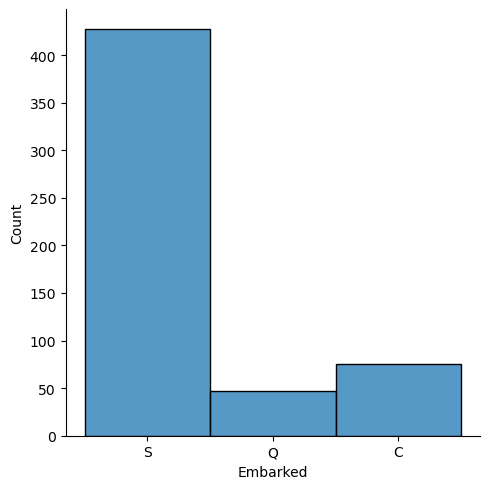

In [373]:
sns.displot(train["Embarked"][train["Survived"]==0])

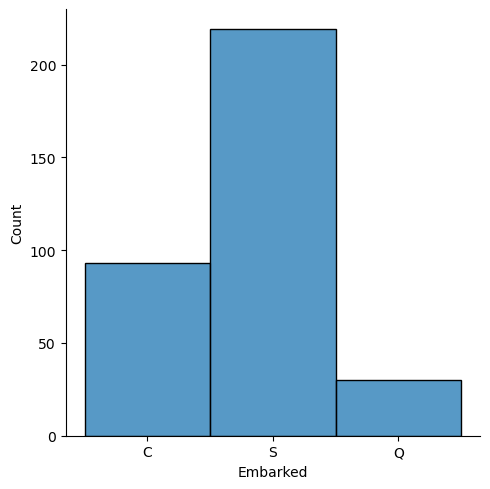

In [375]:
sns.displot(train["Embarked"][train["Survived"]==1])

In [416]:
train.drop(columns=["Ticket"],inplace= True)
test.drop(columns=["Ticket"],inplace= True)

In [417]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


## As Both SinSp and Parch are same things so we will merge them to one single colomn named Family

In [418]:
train["Family"]= train["SibSp"]+train["Parch"]+1

In [419]:
train["Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [420]:
test["Family"]= test["SibSp"]+test["Parch"]+1

In [386]:
test["Family"].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [388]:
train.groupby(["Family"])["Survived"].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [421]:
def cal(number):
    if number ==1:
        return "Alone"
    elif number>1 and number < 5:
        return "Medium"
    else:
        return "Large"
   


In [422]:
train["Family_Size"] = train["Family"].apply(cal)

In [393]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [423]:
test["Family_Size"] = test["Family"].apply(cal)

In [396]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [424]:
train.drop(columns=["SibSp","Parch","Family"],inplace=True)
test.drop(columns=["SibSp","Parch","Family"],inplace=True)
#As we merged These Columns with Family Size so we do not need them

In [401]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium


In [426]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Alone


In [429]:
train.shape

(891, 9)

In [430]:
test.shape

(418, 8)

In [431]:
passengerId = test["PassengerId"]
# As we will drop passenger Id from bith tran and test data but in future we 
#will need test passengerids for that we will save the in variable named PassengerId

In [434]:
train.drop(columns=["Name","PassengerId"],inplace=True)
test.drop(columns=["Name","PassengerId"],inplace=True)

In [439]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [441]:
train.shape

(891, 7)

##### As the column Pclass,Sex Embarked and Family_size contain catagorical data,or model only understand numerical valuesfor that purpose we use pd.get_dummies sode to convert them into numeric, what it can do is it simply creat three colums for Pclass and drop the Firts one, two Columns for sex and drop the first one and so on

In [444]:
train = pd.get_dummies(train, columns=["Pclass","Sex","Embarked","Family_Size"],drop_first=True)

In [445]:
train.head(2)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1


In [447]:
train.shape

(891, 10)

In [448]:
test = pd.get_dummies(test, columns=["Pclass","Sex","Embarked","Family_Size"],drop_first=True)

In [449]:
test.shape

(418, 9)

# Select features and target variable

In [487]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

# Split the data into training and testing sets

In [488]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [489]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the Model

In [490]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

### Make Predictions

In [491]:
y_prid= classifier.predict(X_test)

# Evaluate the Model

In [493]:
from sklearn.metrics import accuracy_score
accuracy_score(y_prid,y_test)

0.8156424581005587

# Now we will use this model with accuracy of 81% to the test dat to predict whether the passenger will Survived or not

In [494]:
Xfinal =test.iloc[:,:].values

In [496]:
yFinal = classifier.predict(Xfinal)

In [501]:
yFinal.shape

(418,)

In [504]:
yFinal
#this is our prdiction about test data on basis of our traind model

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

## now eill will create empty data frame for our prediction and passengersid which is saved in variable PassengerId

In [511]:
Prediction_Data = pd.DataFrame()

In [512]:
Prediction_Data.shape

(0, 0)

In [514]:
Prediction_Data["passengerId"]=passengerId
Prediction_Data["Survived"]= yFinal

In [515]:
Prediction_Data.head()

,passengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


In [519]:
Prediction_Data.to_csv("Titanic_submission.csv",index=False)
# saving final prediction to a csv file with name titanic_submission